In [1]:
import urllib.request
import json
import numpy as np
import PIL.Image as Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import jieba
%matplotlib inline

In [2]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zq/bjqy43y14_dgx166vhc4n0yw0000gn/T/jieba.cache
Loading model cost 1.113 seconds.
Prefix dict has been built succesfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学


In [3]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

Default Mode: 我/ 来到/ 北京/ 清华大学


In [4]:
seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

他, 来到, 了, 网易, 杭研, 大厦


In [5]:
seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


# encoding=utf-8

# app name word cloud

## US

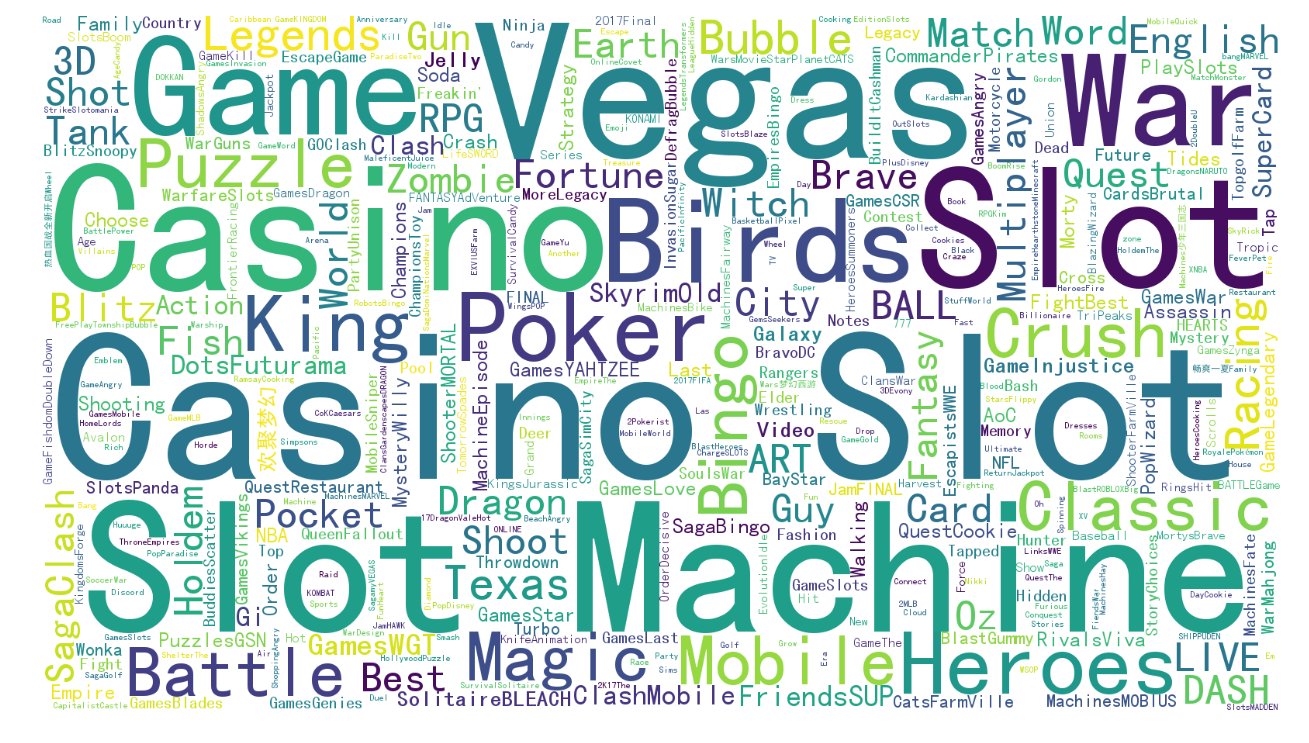

In [6]:
us = urllib.request.urlopen("https://itunes.apple.com/us/rss/topgrossingapplications/limit=200/genre=6014/json").read().decode("utf8")
us = json.loads(us)

usNameStr = ""    
for i in us["feed"]["entry"]:
    name = i["im:name"]["label"]
    usNameStr += name

wordCloud = WordCloud(max_words = 2000, width=1600, height=900, background_color="white", font_path = "/Library/Fonts/SimHei.ttf").generate(usNameStr)

plt.figure(figsize=(16, 9))
plt.imshow(wordCloud)
#plt.title("US App Store Top 200 Grossing Games Name Wordcloud")
plt.axis("off")
wordCloud.to_file( "US.png")

## CN

In [7]:
cn = urllib.request.urlopen("https://itunes.apple.com/cn/rss/topgrossingapplications/limit=200/genre=6014/json").read().decode("utf8")
cn = json.loads(cn)

### cut all = false word split

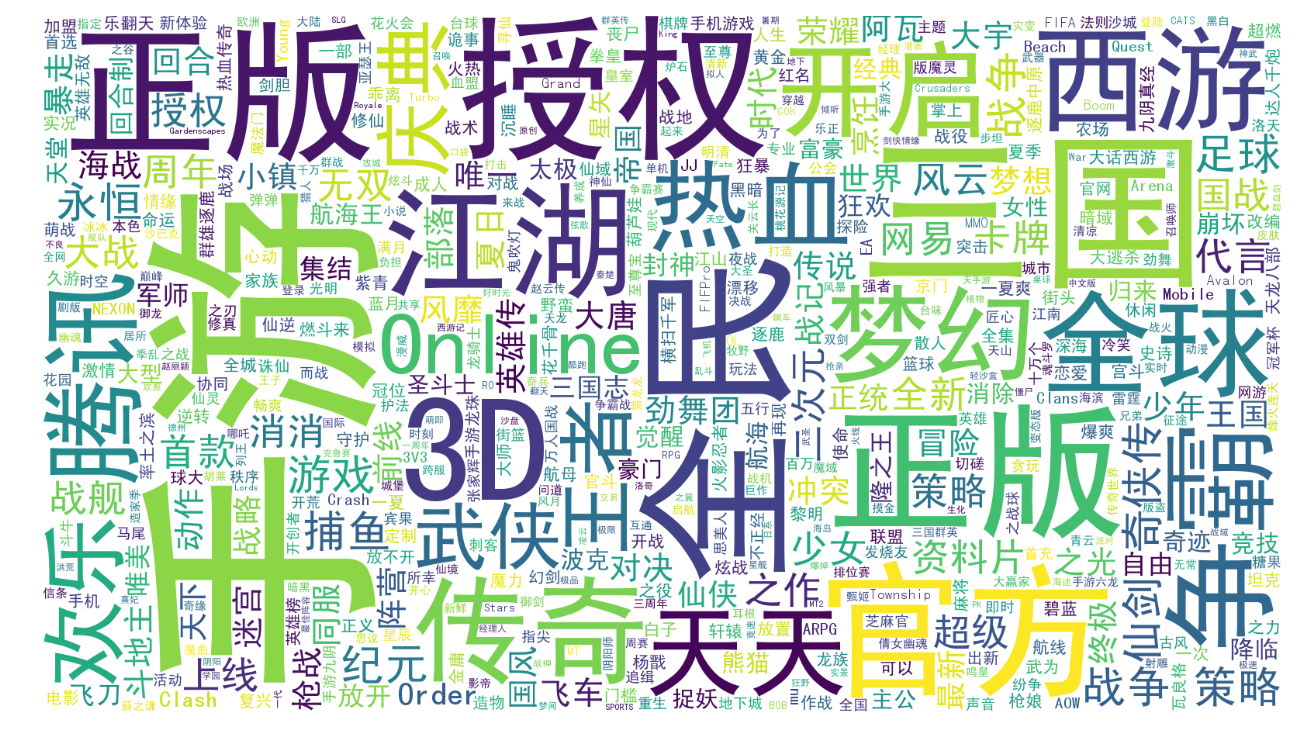

In [8]:
cnNameStr = ""
    #name = i["name"]#.replace(" ", "")
    #cnNameStr +=name

for i in cn["feed"]["entry"]:
    name = i["im:name"]["label"]
    cnNameStr += name
cnNameStr

wordlist = jieba.cut(cnNameStr, cut_all=False)
word_space_split=" ".join(wordlist)
wordCloud = WordCloud(max_words = 2000, width=1600, height=900, background_color="white", font_path = "/Library/Fonts/SimHei.ttf").generate(word_space_split)

plt.figure(figsize=(16, 9), dpi=1000)
plt.imshow(wordCloud)

#plt.title("CN App Store Top 200 Grossing Games Name Wordcloud")
plt.axis("off")
#plt.imsave("CN.png",wordCloud)
wordCloud.to_file( "CNFalse.png")

### Cut for search word split

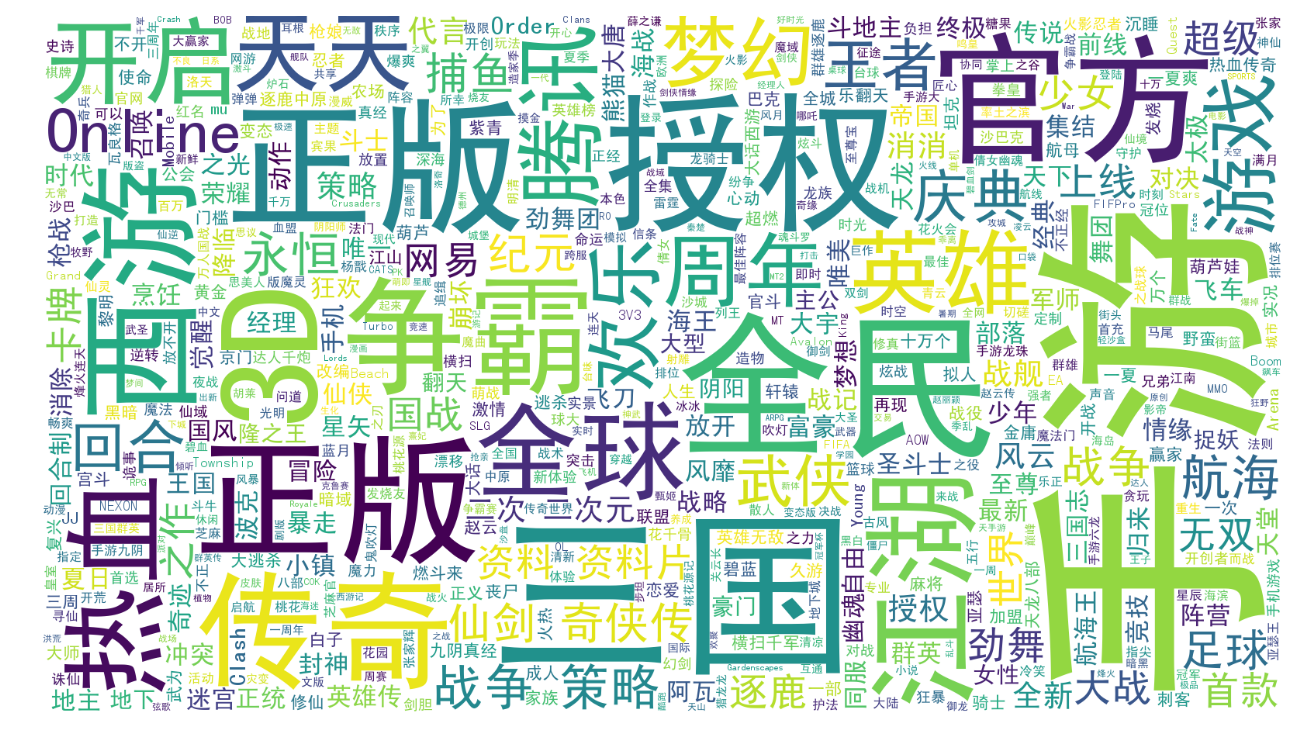

In [9]:
wordlist = jieba.cut_for_search(cnNameStr)
word_space_split=" ".join(wordlist)
wordCloud = WordCloud(max_words = 2000, width=1600, height=900, background_color="white", font_path = "/Library/Fonts/SimHei.ttf").generate(word_space_split)

plt.figure(figsize=(16, 9), dpi=1000)
plt.imshow(wordCloud)

#plt.title("CN App Store Top 200 Grossing Games Name Wordcloud")
plt.axis("off")
#plt.imsave("CN.png",wordCloud)
wordCloud.to_file( "CNCutForSearch.png")

# App description word cloud

## US

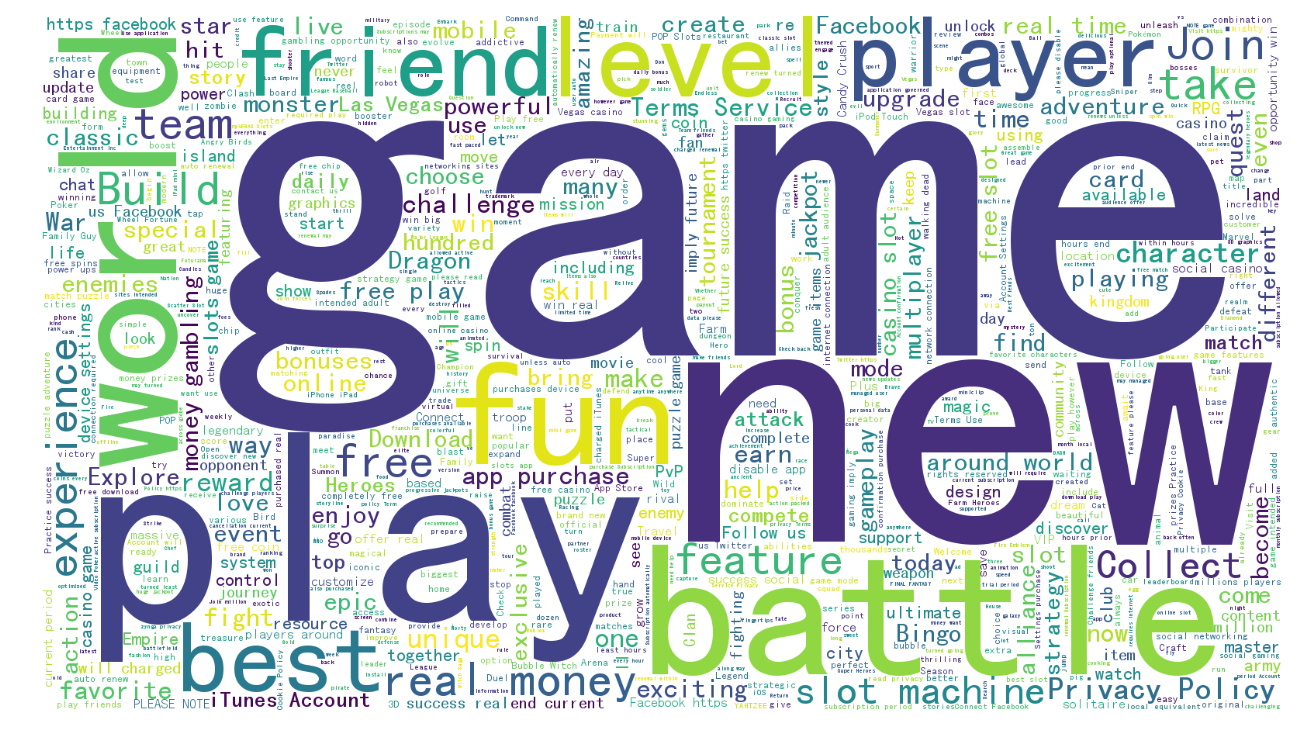

In [14]:
usDescriptionStr = ""    
for i in us["feed"]["entry"]:
    name = i["summary"]["label"]
    usDescriptionStr += name

wordCloud = WordCloud(max_words = 800, width=1600, height=900, background_color="white", font_path = "/Library/Fonts/SimHei.ttf").generate(usDescriptionStr)

plt.figure(figsize=(16, 9))
plt.imshow(wordCloud)
#plt.title("US App Store Top 200 Grossing Games Description Wordcloud")
plt.axis("off")
wordCloud.to_file( "USDescription.png")

## CN

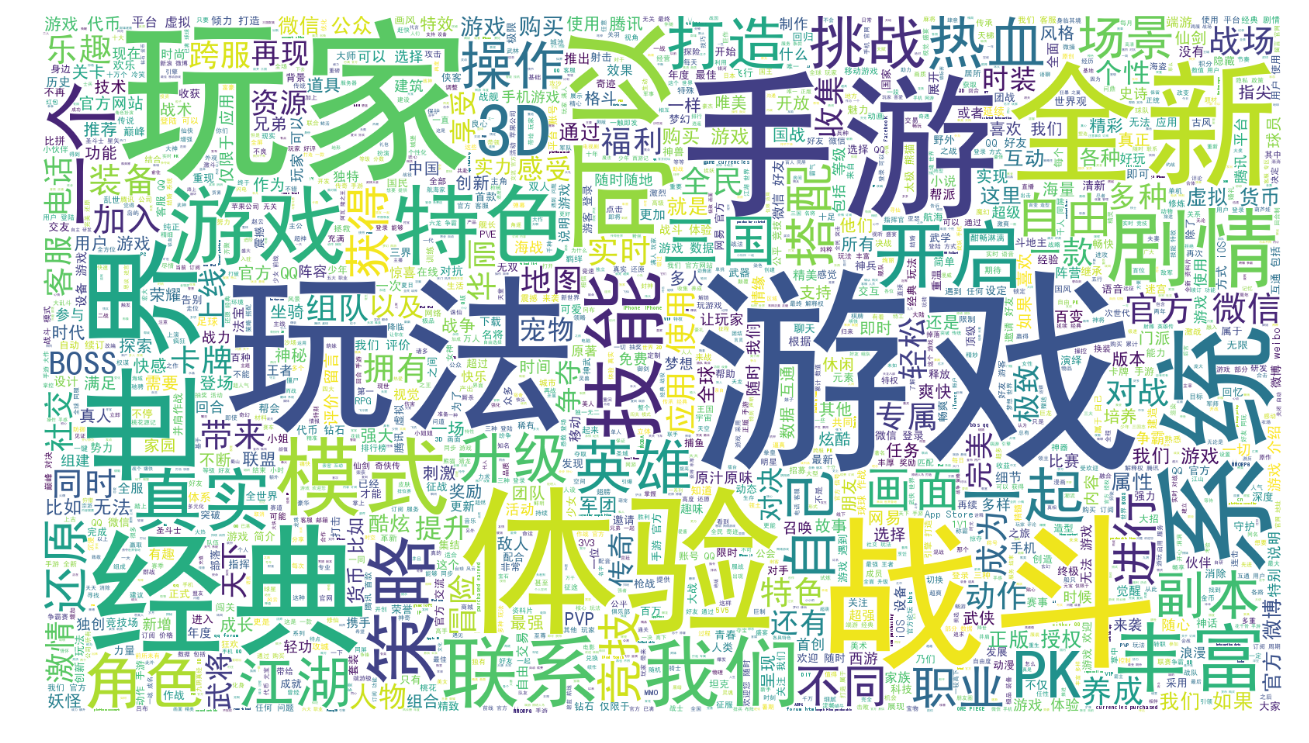

In [13]:
cnDescriptionStr = ""    
for i in cn["feed"]["entry"]:
    name = i["summary"]["label"]
    cnDescriptionStr += name

wordlist = jieba.cut(cnDescriptionStr, cut_all=False)
word_space_split=" ".join(wordlist)
wordCloud = WordCloud(max_words = 2000, width=1600, height=900, background_color="white", font_path = "/Library/Fonts/SimHei.ttf").generate(word_space_split)

plt.figure(figsize=(16, 9))
plt.imshow(wordCloud)
#plt.title("CN App Store Top 200 Grossing Games Description Wordcloud")
plt.axis("off")
wordCloud.to_file( "cnDescription.png")

## US

In [4]:
print(us)

{'feed': {'updated': '2017-07-23T01:42:28.000-07:00', 'results': [{'url': 'https://itunes.apple.com/us/app/pok%C3%A9mon-go/id1094591345?mt=8&app=itunes', 'artworkUrl100': 'http://is2.mzstatic.com/image/thumb/Purple118/v4/01/99/66/01996644-f9de-b71f-9b2d-c21760b380e0/source/200x200bb.png', 'genreNames': ['Games', 'Health & Fitness'], 'artistUrl': 'https://itunes.apple.com/us/developer/niantic-inc/id1037205060?mt=8', 'artistName': 'Niantic, Inc.', 'copyright': '© 2016-2017 Niantic, Inc. © 2016-2017 Pokémon. © 1995-2017 Nintendo/Creatures Inc./GAME FREAK inc.', 'contentAdvisoryRating': '9+', 'id': '1094591345', 'version': '1.39.0', 'artistId': '1037205060', 'kind': 'iosSoftware', 'trackExplicitness': '9+', 'primaryGenreName': 'Games', 'name': 'Pokémon GO', 'trackCensoredName': 'Pokémon GO', 'releaseDate': '2016-07-07T00:00:00Z'}, {'url': 'https://itunes.apple.com/us/app/pandora-music-radio/id284035177?mt=8&app=itunes', 'artworkUrl100': 'http://is3.mzstatic.com/image/thumb/Purple117/v4/d5/

In [5]:
#prettyprint json
print(json.dumps(us, indent=4, sort_keys=True))

{
    "feed": {
        "author": {
            "name": "iTunes Store",
            "uri": "http://wwww.apple.com/us/itunes/"
        },
        "copyright": "Copyright \u00a9 2017 Apple Inc. All Rights Reserved.",
        "country": "us",
        "icon": "http://itunes.apple.com/favicon.ico",
        "id": "https://rss.itunes.apple.com/api/v1/us/ios-apps/top-grossing/200/explicit/json",
        "links": [
            {
                "self": "https://rss.itunes.apple.com/api/v1/us/ios-apps/top-grossing/200/explicit/json"
            },
            {
                "alternate": "https://itunes.apple.com/WebObjects/MZStore.woa/wa/viewTop?genreId=36&popId=38&app=itunes"
            }
        ],
        "results": [
            {
                "artistId": "1037205060",
                "artistName": "Niantic, Inc.",
                "artistUrl": "https://itunes.apple.com/us/developer/niantic-inc/id1037205060?mt=8",
                "artworkUrl100": "http://is2.mzstatic.com/image/thumb/Pu

In [6]:
len(us["feed"]["results"])

200

In [7]:
usNameStr

"Pokémon GO Pandora - Music & Radio Netflix Candy Crush Saga Game of War - Fire Age Clash Royale Clash of Clans Tinder Mobile Strike YouTube - Watch Videos, Music, and Live Streams Candy Crush Soda Saga HBO NOW: Stream original series, hit movies & more Hulu: Watch TV Shows & Stream the Latest Movies Gardenscapes - New Acres Spotify Music Toy Blast Heart of Vegas Slots – Casino Slot Machine Games ROBLOX Slotomania Slots Casino: Vegas Slot Machines Games MARVEL Contest of Champions Choices: Stories You Play DRAGON BALL Z DOKKAN BATTLE Golf Clash Big Fish Casino – Best Vegas Slot Machines & Games Slot Machines - House of Fun Vegas Casino Games Match™ - #1 Dating App. Smule Sing! Zoosk - #1 Dating App CSR Racing 2 Bumble – Find a Date, Meet Friends & Network Summoners War SoundCloud - Music & Audio DoubleDown Casino & Slots  – Vegas Slot Machines! Episode - Choose Your Story + Pretty Little Liars Design Home World Series of Poker – WSOP Texas Holdem Game Fishdom TIDAL Jackpot Party Casino

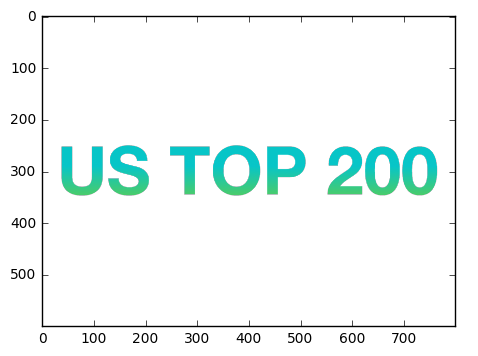

In [8]:
usPic = np.array(Image.open('usPic.png'))
plt.imshow(usPic)

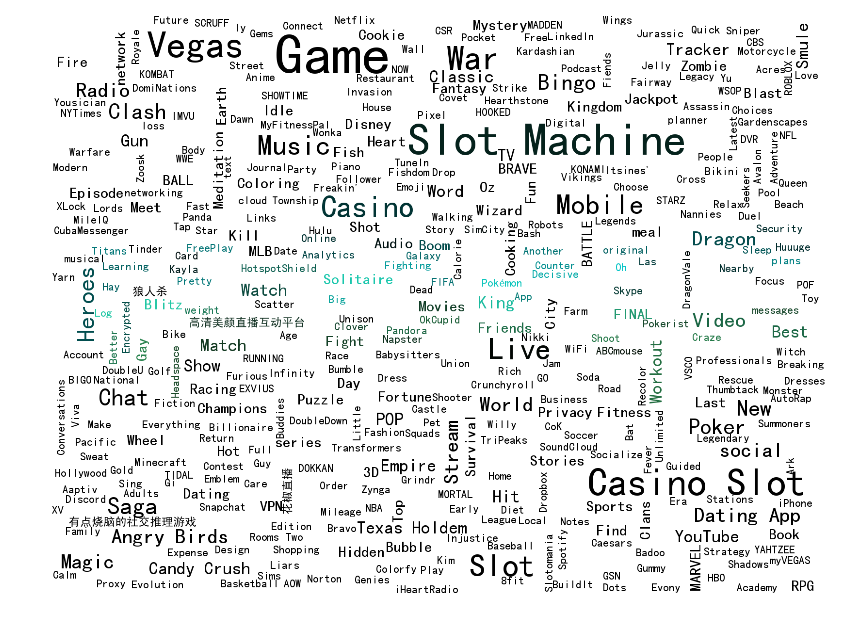

In [10]:
#coloring = np.array(Image.open("vap.png"))
coloring = usPic
wordCloud = WordCloud(background_color="white", width=1600, height=900, max_words = 2000, mask=coloring, max_font_size=60, random_state=42, scale=2, font_path = "/Library/Fonts/SimHei.ttf").generate(usNameStr)

image_colors=ImageColorGenerator(coloring)
plt.figure(figsize=(10, 10))
plt.imshow(wordCloud.recolor(color_func=image_colors))
plt.imshow(wordCloud)
plt.axis("off")
plt.show()

## CN

In [40]:
cnNameStr

'王者荣耀Fate/Grand Order（命运-冠位指定）魂斗罗:归来-官方正版梦幻西游-欢聚梦幻 畅爽一夏天龙八部手游神武2-夏日活动乐翻天倩女幽魂-零门槛全民争霸赛仙剑奇侠传五-大宇正版授权寻仙胡莱三国2-最新资料片 军师争霸鬼吹灯之牧野诡事-正版授权 专业摸金大话西游-全民争霸季火热开战热血江湖-江湖不正经，玩出新花Young轩辕传奇阿瓦隆之王：全球服阴阳师-夏日花火会全民仙逆-耳根正版授权修真仙侠手游剑侠情缘王国纪元(Lords Mobile)-全球国战穿越火线:枪战王者圣斗士星矢-集结 超燃动作手游开心消消乐® - 夏季周赛开启深海探险五行天手游 - 万人国战欢乐斗地主•腾讯太极熊猫3：猎龙龙之谷火影忍者大富豪3-富豪人生天天爱消除龙族世界-江南正版授权问道-薛之谦代言 神仙居所开启洛奇英雄传•永恒 - NEXON正版授权魔法门之英雄无敌：战争纪元永恒纪元-龙骑士觉醒《炉石传说》率土之滨-全自由实时沙盘战略魔力冒险团—日系动漫二次元RPG手游崩坏3我的使命-战争策略手游西游X三国-2017首款西游大战三国卡牌手游梦幻诛仙梦幻花园 (Gardenscapes)奇迹暖暖诛仙碧血剑-金庸正版再现明清武侠江湖全民飞机大战腾讯欢乐麻将全集御龙在天航海王 启航 （正版授权-千万海迷首选）葫芦娃-正版授权手游光明大陆-指尖开荒 阵营对决COK列王的纷争-全球同服战略手游开创者碧蓝航线-战舰拟人即时海战手游宾果消消消 -赵丽颖代言全民奇迹mu手游-2017最新手游大型网游游戏镇魔曲手游暴走地下城-幽魂暗域时空猎人-全国公会竞技赛热血燃斗来袭大唐无双唯美版—网易新国风群战手游部落冲突 (Clash of Clans)征途十万个冷笑话：番剧版三国赵云传-匠心之作三国传奇手游传奇世界江湖：武侠传-江湖风云 武为至尊拳皇98终极之战OL-2周年庆典部落冲突:皇室战争(Clash Royale)全民突击阿瓦隆之王: 龙之战役 (King of Avalon)热血传奇天下-洛天依、乐正绫加盟狂欢季乱轰三国志-全网跨服王者争霸熹妃传-一部可以玩的宫斗小说JJ斗地主黎明之光-刺客信条正版皮肤授权散人天堂 - 热血红名PK巅峰之作天天酷跑丧尸之战球球大作战（BOB）-全新资料片:极限大逃杀！天天炫斗少年三国志-热血国战全新开启狂暴之翼-3D炫战ARPG手游我欲封天山海战(成人轻沙盒放置修

In [17]:
print(json.dumps(cn, indent=4, sort_keys=True))

{
    "feed": {
        "author": {
            "name": {
                "label": "iTunes Store"
            },
            "uri": {
                "label": "http://www.apple.com/itunes/"
            }
        },
        "entry": [
            {
                "category": {
                    "attributes": {
                        "im:id": "6014",
                        "label": "\u6e38\u620f",
                        "scheme": "https://itunes.apple.com/cn/genre/ios-%E6%B8%B8%E6%88%8F/id6014?mt=8&uo=2",
                        "term": "Games"
                    }
                },
                "id": {
                    "attributes": {
                        "im:bundleId": "com.tencent.smoba",
                        "im:id": "989673964"
                    },
                    "label": "https://itunes.apple.com/cn/app/%E7%8E%8B%E8%80%85%E8%8D%A3%E8%80%80/id989673964?mt=8&uo=2"
                },
                "im:artist": {
                    "attributes": {
        

In [27]:

cn["feed"]["entry"][0]["im:name"]["label"]

'王者荣耀'

In [29]:
cn["feed"]["entry"][0]["summary"]["label"]

'王者荣耀：无处不团，两亿好友聚好玩\n\n\n\n【游戏介绍】\n《王者荣耀》是腾讯第一5V5英雄公平对战手游，腾讯最新MOBA手游大作！5V5王者峡谷、5V5深渊大乱斗、以及3V3、1V1等多样模式一键体验，热血竞技尽享快感！海量英雄随心选择，精妙配合默契作战！10秒实时跨区匹配，与好友组队登顶最强王者！操作简单易上手，一血、五杀、超神，极致还原经典体验！实力操作公平对战，回归MOBA初心！\n赶快加入《王者荣耀》，随时开启你的激情团战！ \n\n\n\n【游戏特色】\n1、5V5！越塔强杀！超神！\n5V5经典地图，三路推塔，呈现原汁原味的对战体验。英雄策略搭配，组建最强阵容，默契配合极限666！\n\n\n\n2、深渊大乱斗！随机英雄一路团战！\n5V5大乱斗，即刻激情团战！随机盲选英雄，全团杀中路，冲突一触即发！一条路，全神装，血战到底！\n\n\n\n3、随时开团！10分钟爽一把！\n适合手机的MOBA游戏，10分钟享受极致竞技体验。迂回作战，手脑配合，一战到底！人多，速来！\n\n\n\n4、公平竞技！好玩不坑拼实力！\n凭实力carry全场，靠技术决定胜负。不做英雄养成，不设体力，还你最初的游戏乐趣！\n\n\n\n5、指尖超神！精妙走位秀操作！\n微操改变战局！手速流？意识流？看我精妙走位，力压群雄，打出钻石操作！收割，连杀超神！\n\n\n\n【特别说明】\n在游戏《王者荣耀》中，用户登录时可以选择“与QQ好友玩/与微信好友玩/游客登录”，三种登录方式在iOS设备上的游戏数据不互通（包括等级、钻石、金币等）。用户在游戏中购买的游戏代币“点券”仅限在本应用中使用。腾讯的虚拟货币，比如Q币、Q点无法在本应用中使用。\n\n\n\n【联系我们】\n如果您喜欢我们的游戏，欢迎随时给我们评价、留言。\n官方网站：http://pvp.qq.com\n官方微信：heromoba'

In [17]:
wordlist

<generator object Tokenizer.cut at 0x1095619e8>

In [76]:
word_space_split

'王者 荣耀 梦幻 西游   欢聚 梦幻 畅 爽 一 夏天 天龙 天龙八部 八部 手 游魂 魂斗罗   归来   官方 方正 正版 胡 莱 三国 2  刘 涛 倾情 代言 腾讯 视频   鬼吹灯 吹灯 之 黄皮 黄皮子 皮子 坟 全网 独 播 轩辕 传奇 倩女 倩女幽魂 幽魂   零 门槛 全民 争霸 争霸赛 火影 火影忍者 忍者 魔法 魔法门 法门 之 英雄 英雄无敌 无敌   战争 纪元 大话 大话西游 西游   全民 争霸 季 火热 开战 龙 之 谷 阿瓦 瓦隆 之 王   全球 服 爱 奇 艺   中国 国有 嘻 哈   新歌 歌声 2 全网 独 播 暴走 地下 地下城 下城   幽魂 暗 域 热血 江湖   江湖 不正 不正经 正经   玩出 出新 新花 Young 阴阳 阴阳师   全区 互通 现世 集结 崩坏 3MOMO 陌 陌   开启 视频 社交   用 直播 分享 生活 QQ 剑侠 剑侠情缘 情缘 射雕 英雄 英雄传 2 开心 消消 乐    夏季 周 赛 开启 深海 探险 还珠格格 格格   最 Q 萌 的 清宫 传奇 王国 纪元  LordsMobile   全球 国 战 快 手 圣斗士 斗士 星 矢   集结 超 燃 动作 手 游 欢乐 斗地主 地主   腾讯 五行 行天 手 游   万 人 国 战 穿越 火线   枪战 王者 优 酷 视频   春风 十里 不如 你   火星 情报 情报局 3 全网 独 播 梦幻 诛 仙 一起 起来 飞车   全城 追缉 竞速 漂移 神武 2  夏日 活动 乐翻天 翻天 西游 西游记 游记 之 大圣 归来   电影 正版 授权 手 游 大富 富豪 3  富豪 人生 天天 爱 消除 全民 飞机 大战 问道   和   我们 的 少年 少年时代 年时 时代   薛 之 谦 一起 玩 永恒 纪元   新 资料 资料片   龙骑士 骑士 觉醒  4V4 新 跨 服 PK 全民 突击 太极 熊猫 3  猎 龙 百 斩 成仙   完美 修仙 再续 梦幻 情缘 诛 仙 率土之滨   全 自由 实时 沙盘 战略 战舰 猎手 HD  全民 推荐 正版 战舰 射击 手 游 葫芦 葫芦娃   正版 授权   5 亿 人 都 在 玩 的 顶级 国民 手 游   魔力 冒险 团   日 系 动漫 二次 二次元 RPG 手 游 天空 